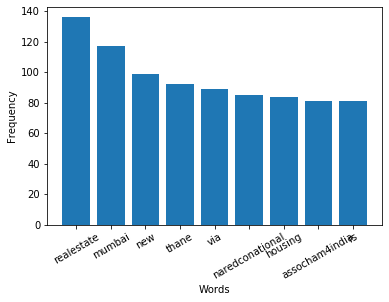

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 26 11:37:29 2019

@author: Parth
"""

import GetOldTweets3 as got

tweetCriteria = got.manager.TweetCriteria().setUsername("@N_Hiranandani")\
                                           .setMaxTweets(1000)
tweet = got.manager.TweetManager.getTweets(tweetCriteria)

li=[]
for i in tweet:
    li.append(i.text)
    
import active
active.wordcloud(li)